In [8]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low= -180.000, high=180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Import Citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [15]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
    
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key    

# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count}| {city}") 
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1| belushya guba
City not found. Skipping...
Processing Record 2 of Set 1| rikitea
Processing Record 3 of Set 1| port alfred
Processing Record 4 of Set 1| berlevag
Processing Record 5 of Set 1| te anau
Processing Record 6 of Set 1| thompson
Processing Record 7 of Set 1| geraldton
Processing Record 8 of Set 1| kaitangata
Processing Record 9 of Set 1| shingu
Processing Record 10 of Set 1| nikolskoye
Processing Record 11 of Set 1| vardo
Processing Record 12 of Set 1| vysokogornyy
Processing Record 13 of Set 1| punta arenas
Processing Record 14 of Set 1| yellowknife
Processing Record 15 of Set 1| harper
Processing Record 16 of Set 1| mataura
Processing Record 17 of Set 1| pevek
Processing Record 18 of Set 1| kruisfontein
Processing Record 19 of Set 1| cape town
Processing Record 20 of Set 1| coruripe
Processing Record 21 of Set 1| taolanaro
City not found. Skipping...
Processing Record 22 of Set 1| james

Processing Record 45 of Set 4| karaton
Processing Record 46 of Set 4| barentsburg
City not found. Skipping...
Processing Record 47 of Set 4| sobolevo
Processing Record 48 of Set 4| clyde river
Processing Record 49 of Set 4| zlitan
Processing Record 50 of Set 4| rio gallegos
Processing Record 1 of Set 5| saint-pascal
City not found. Skipping...
Processing Record 2 of Set 5| pisco
Processing Record 3 of Set 5| gondanglegi
Processing Record 4 of Set 5| manakara
Processing Record 5 of Set 5| fairbanks
Processing Record 6 of Set 5| leningradskiy
Processing Record 7 of Set 5| tsihombe
City not found. Skipping...
Processing Record 8 of Set 5| malumfashi
Processing Record 9 of Set 5| baykit
Processing Record 10 of Set 5| salta
Processing Record 11 of Set 5| kaohsiung
Processing Record 12 of Set 5| bambous virieux
Processing Record 13 of Set 5| ribeira grande
Processing Record 14 of Set 5| dingle
Processing Record 15 of Set 5| east london
Processing Record 16 of Set 5| rupert
Processing Record 

Processing Record 37 of Set 8| tigil
Processing Record 38 of Set 8| yerbogachen
Processing Record 39 of Set 8| roma
Processing Record 40 of Set 8| anito
Processing Record 41 of Set 8| sedelnikovo
City not found. Skipping...
Processing Record 42 of Set 8| tungkang
City not found. Skipping...
Processing Record 43 of Set 8| broken hill
Processing Record 44 of Set 8| valdivia
Processing Record 45 of Set 8| bichura
Processing Record 46 of Set 8| novovarshavka
Processing Record 47 of Set 8| saleaula
City not found. Skipping...
Processing Record 48 of Set 8| aksarka
Processing Record 49 of Set 8| hammerfest
Processing Record 50 of Set 8| bathsheba
Processing Record 1 of Set 9| pompeu
Processing Record 2 of Set 9| aitape
Processing Record 3 of Set 9| grindavik
Processing Record 4 of Set 9| gimli
Processing Record 5 of Set 9| bela
Processing Record 6 of Set 9| ahipara
Processing Record 7 of Set 9| fuling
Processing Record 8 of Set 9| latung
Processing Record 9 of Set 9| rudraprayag
Processing R

Processing Record 31 of Set 12| were ilu
Processing Record 32 of Set 12| torbat-e jam
Processing Record 33 of Set 12| nipawin
Processing Record 34 of Set 12| port said
Processing Record 35 of Set 12| poum
Processing Record 36 of Set 12| pandelys
City not found. Skipping...
Processing Record 37 of Set 12| jizan
Processing Record 38 of Set 12| plettenberg bay
Processing Record 39 of Set 12| tubruq
City not found. Skipping...
Processing Record 40 of Set 12| lismore
Processing Record 41 of Set 12| usinsk
Processing Record 42 of Set 12| nizhneyansk
City not found. Skipping...
Processing Record 43 of Set 12| lagoa
Processing Record 44 of Set 12| la paz
Processing Record 45 of Set 12| fengzhen
Processing Record 46 of Set 12| buqayq
City not found. Skipping...
Processing Record 47 of Set 12| texarkana
Processing Record 48 of Set 12| houma
Processing Record 49 of Set 12| beyneu
Processing Record 50 of Set 12| utiroa
City not found. Skipping...
Processing Record 1 of Set 13| salinas
Processing R

In [17]:
len(city_data)

555

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.57,75,100,17.45,PF,2022-01-26 00:10:29
1,Port Alfred,-33.5906,26.8910,72.12,84,94,9.95,ZA,2022-01-26 00:10:29
2,Berlevag,70.8578,29.0864,31.64,64,97,26.93,NO,2022-01-26 00:10:30
3,Te Anau,-45.4167,167.7167,56.19,81,85,2.84,NZ,2022-01-26 00:10:30
4,Thompson,55.7435,-97.8558,-3.69,89,87,12.01,CA,2022-01-26 00:10:30
5,Geraldton,-28.7667,114.6000,73.81,53,0,11.50,AU,2022-01-26 00:10:31
6,Kaitangata,-46.2817,169.8464,55.26,88,69,7.76,NZ,2022-01-26 00:10:31
7,Shingu,33.7333,135.9833,47.34,58,21,4.54,JP,2022-01-26 00:10:32
8,Nikolskoye,59.7035,30.7861,14.92,99,74,3.87,RU,2022-01-26 00:10:32
9,Vardo,70.3705,31.1107,26.80,72,42,24.87,NO,2022-01-26 00:06:24


In [20]:
# Reorder the columns as city, country, date, lat, lng, max temp, humidity, cloudiness, and wind speed.

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-01-26 00:10:29,-23.1203,-134.9692,78.57,75,100,17.45
1,Port Alfred,ZA,2022-01-26 00:10:29,-33.5906,26.8910,72.12,84,94,9.95
2,Berlevag,NO,2022-01-26 00:10:30,70.8578,29.0864,31.64,64,97,26.93
3,Te Anau,NZ,2022-01-26 00:10:30,-45.4167,167.7167,56.19,81,85,2.84
4,Thompson,CA,2022-01-26 00:10:30,55.7435,-97.8558,-3.69,89,87,12.01
5,Geraldton,AU,2022-01-26 00:10:31,-28.7667,114.6000,73.81,53,0,11.50
6,Kaitangata,NZ,2022-01-26 00:10:31,-46.2817,169.8464,55.26,88,69,7.76
7,Shingu,JP,2022-01-26 00:10:32,33.7333,135.9833,47.34,58,21,4.54
8,Nikolskoye,RU,2022-01-26 00:10:32,59.7035,30.7861,14.92,99,74,3.87
9,Vardo,NO,2022-01-26 00:06:24,70.3705,31.1107,26.80,72,42,24.87


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

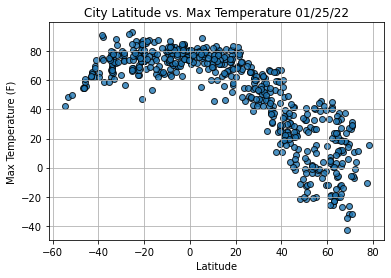

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph prperties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig1.png")

# Show plot.
plt.show()

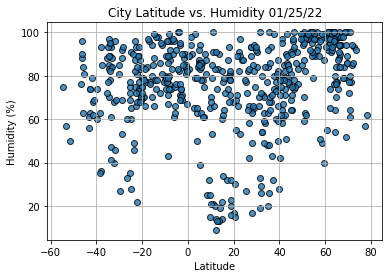

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

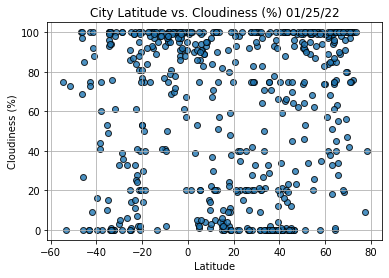

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

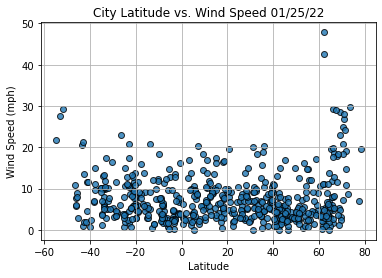

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()